# ENMO integrated over epochs of variable length

**GitHub repository:** https://github.com/TevaSemStudent/HAH913E-ENMO6-Plots

**Sources:**
- https://www.geeksforgeeks.org/python/working-csv-files-python/
- Copilot's Integrated code review
- Copilot prompts:
    - Integrate ENMO over 10s intervals. Each row is separated by 0.02s intervals.
        - Modification: created variables for epoch length and number of epoch,as well as a variable for the plot.


Created by Teva Semeria for the HAH913E module of the Master of Digital Sciences for Health at the University of Montpellier.

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Loading data from the CSV file

filename = "./data/acc_data.csv"  # File name
fields = []  # Column names
rows = []    # Data rows

with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)  # Reader object

    fields = next(csvreader)  # Read header
    for row in csvreader:     # Read rows
        rows.append(row)

    print("Total no. of rows: %d" % csvreader.line_num)  # Row count

print('Field names are: ' + ', '.join(fields))

print('\nFirst 5 rows are:\n')
for row in rows[:5]:
    for col in row:
        print("%10s" % col, end=" ")
    print('\n')

Total no. of rows: 21002
Field names are: # accelerometer data in g

First 5 rows are:

         t          x          y          z 

      0.00    -0.0938    -0.0156     0.9531 

      0.02    -0.0938    -0.0156     0.9531 

      0.04    -0.0938    -0.0156     0.9531 

      0.06    -0.0938    -0.0156     0.9531 



In [13]:
# ENMO calculation
temp = rows[1:len(rows)]  # Exclude header
acc_data = np.array(temp, dtype=float)  # Convert to float numpy array

time = acc_data[:, 0]  # Time column
acc_data = acc_data[:, 1:4]  # x, y, z columns
def compute_enmo(acc):
    """Compute the Euclidean Norm Minus One (ENMO) for a given acceleration vector."""
    enmo = np.linalg.norm(acc) - 1.0
    return enmo

ENMO = np.array([compute_enmo(acc) for acc in acc_data])  # Compute ENMO for each row


Text(0.5, 0, 'Time (min)')

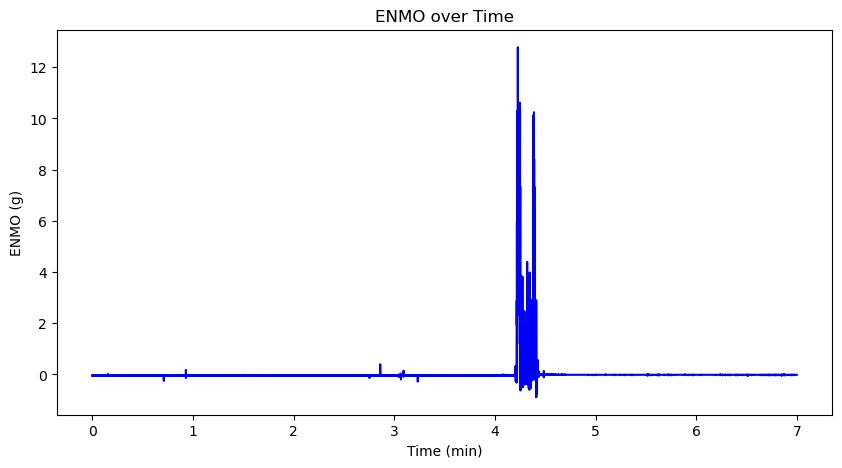

In [14]:
# Plotting ENMO values
plt.figure(figsize=(10, 5)) # Set figure size
plt.plot(time/60, ENMO, label='ENMO', color='blue')
plt.title('ENMO over Time')
plt.ylabel('ENMO (g)')
plt.xlabel('Time (min)')

Creation of a function to integrate the ENMO over different epochs. The function takes as arguments the ENMO values, the epoch legth and the sampling interval of the values (here 0.02s).

In [15]:
# ENMO integration function.
def integrate_enmo(enmo_values, epoch_length, sampling_interval):
    """Integrate ENMO values over specified epoch length and convert to g/min."""
    num_epochs = len(enmo_values) // epoch_length
    integrated_enmo = np.array([np.mean(enmo_values[i*epoch_length:(i+1)*epoch_length]) for i in range(num_epochs)])
    integrated_enmo_g_per_min = integrated_enmo * (60 / (epoch_length * sampling_interval))  # Convert to g/min
    return integrated_enmo_g_per_min


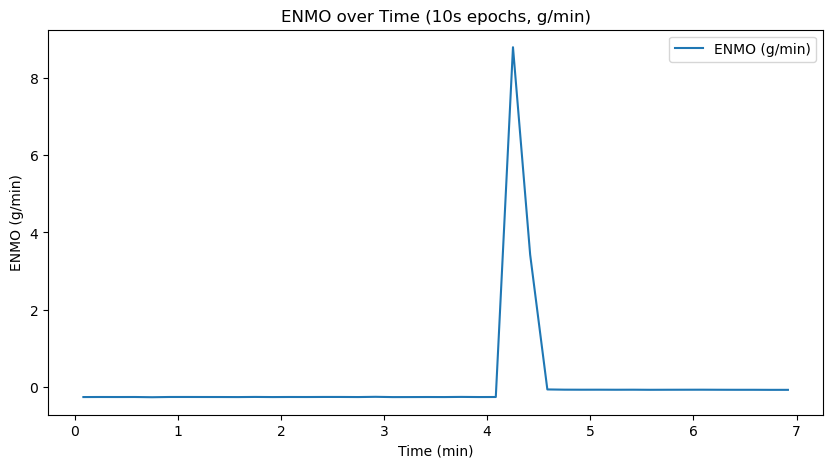

In [16]:
# Integrate ENMO over 10s intervals (500 rows per epoch)
sampling_interval = 0.02  # seconds
epoch_length = int(10 / sampling_interval)  # 10 seconds / 0.02s per row = 500 rows per epoch
num_epochs = len(ENMO) // epoch_length

time_epoch = np.array([np.mean(time[i*epoch_length:(i+1)*epoch_length]) for i in range(num_epochs)])
integrated_enmo_10s_g_per_min = integrate_enmo(ENMO, epoch_length, sampling_interval)

# Plot ENMO as g/min
plt.figure(figsize=(10, 5))
plt.plot(time_epoch / 60, integrated_enmo_10s_g_per_min, label='ENMO (g/min)')
plt.title('ENMO over Time (10s epochs, g/min)')
plt.ylabel('ENMO (g/min)')
plt.xlabel('Time (min)')
plt.legend()
plt.show()

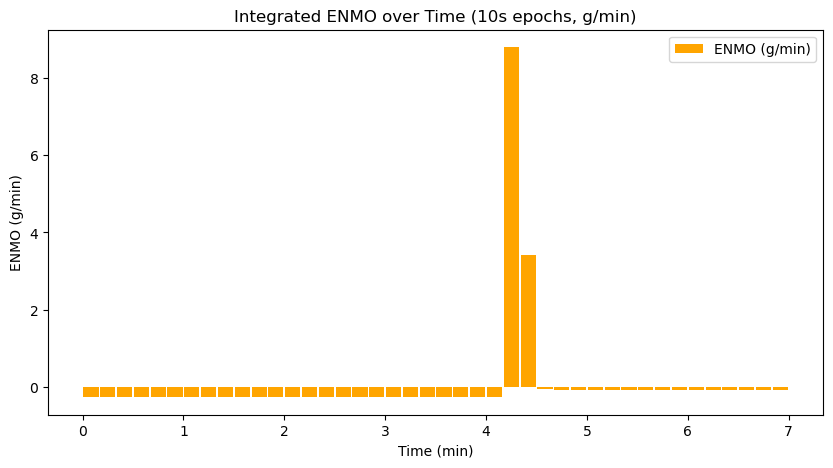

In [17]:
# Display the integrated ENMO as a bar plot
plt.figure(figsize=(10, 5))
plt.bar(time_epoch / 60, integrated_enmo_10s_g_per_min, width=0.15, color='orange', label='ENMO (g/min)')
plt.title('Integrated ENMO over Time (10s epochs, g/min)')
plt.ylabel('ENMO (g/min)')
plt.xlabel('Time (min)')
plt.legend()
plt.show()

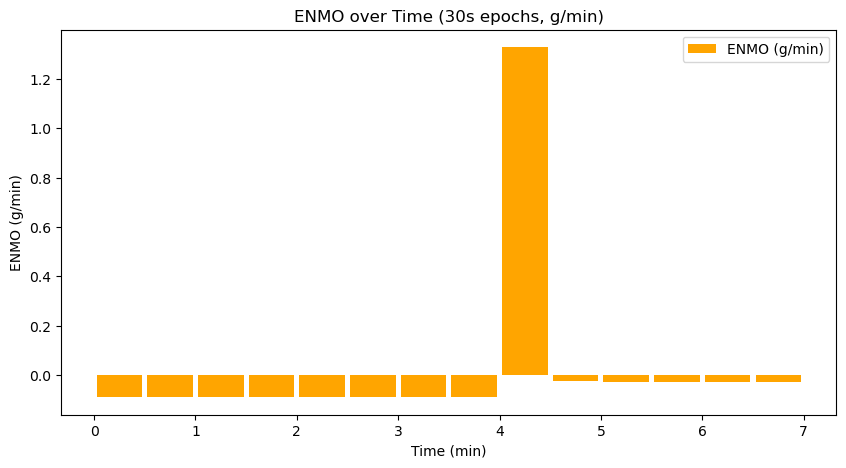

In [22]:
#Integrate ENMO over 30s intervals (1500 rows per epoch)
sampling_interval = 0.02  # seconds
epoch_length = int(30 / sampling_interval)  # 30 seconds / 0.02s per row = 1500 rows per epoch
num_epochs = len(ENMO) // epoch_length

time_epoch = np.array([np.mean(time[i*epoch_length:(i+1)*epoch_length]) for i in range(num_epochs)])
integrated_enmo_30s_g_per_min = integrate_enmo(ENMO, epoch_length, sampling_interval)

# Plot ENMO as g/min
plt.figure(figsize=(10, 5))
plt.bar(time_epoch / 60, integrated_enmo_30s_g_per_min, width=0.45, color='orange', label='ENMO (g/min)')
plt.title('ENMO over Time (30s epochs, g/min)')
plt.ylabel('ENMO (g/min)')
plt.xlabel('Time (min)')
plt.legend()
plt.show()

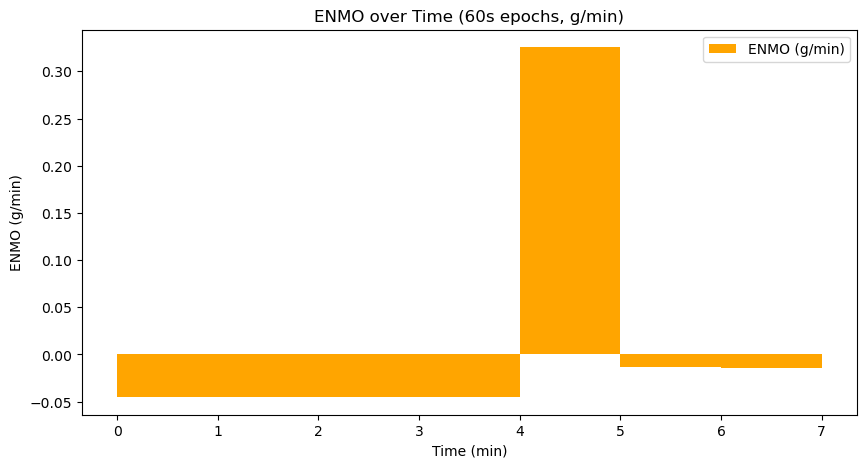

In [24]:
# Integrate ENMO over 60s intervals (3000 rows per epoch)
sampling_interval = 0.02  # seconds
epoch_length = int(60 / sampling_interval)  # 60 seconds / 0.02s per row = 3000 rows per epoch
num_epochs = len(ENMO) // epoch_length

time_epoch = np.array([np.mean(time[i*epoch_length:(i+1)*epoch_length]) for i in range(num_epochs)])
integrated_enmo_60s_g_per_min = integrate_enmo(ENMO, epoch_length, sampling_interval)

# Plot ENMO as g/min
plt.figure(figsize=(10, 5))
plt.bar(time_epoch / 60, integrated_enmo_60s_g_per_min, width=1.0, color='orange', label='ENMO (g/min)')
plt.title('ENMO over Time (60s epochs, g/min)')
plt.ylabel('ENMO (g/min)')
plt.xlabel('Time (min)')
plt.legend()
plt.show()